In [1]:
from load_dataset import load_german_credit_dataset, load_diabetes_dataset
from model_manager import PytorchModelManager
from cf_engine.engine import CFEnginePytorch
from cf_engine.counterfactual import CounterfactualExampleBySubset

In [2]:
import numpy as mp
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

In [3]:
dataset = load_diabetes_dataset()
mm = PytorchModelManager(dataset)
dm = mm.get_dir_manager()
try:
    mm.load_model()
except FileNotFoundError:
    mm.train()
    mm.save_model()
# mm.train()
engine = CFEnginePytorch(mm, dataset)

In [4]:
dataset.get_columns()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome_0',
 'Outcome_1']

In [5]:
subset = {'Glucose': {'max': 82, 'min': 0}, 'Age': {'max': 50, 'min': 0}}
subset_attr_cf = engine.generate_cfs_subset(subset, batch_size=128)

In [6]:
target_name = dataset.get_target_names(False)
pre_target_name = '{}_pred'.format(target_name)
desc = dataset.get_description()
neg = desc[target_name]['category'][0]
pos = desc[target_name]['category'][1]
def plot_subset_cf(subset_attr_cf):
    for i, (feature, subset_cf) in enumerate(subset_attr_cf.items()):
        cf_df = subset_cf.get_cf().reset_index(drop=True)
        original_df = subset_cf.get_instance().reset_index(drop=True)
#         valid_index = cf_df[pre_target_name] != \
#             original_df.loc[cf_df['OriginIndex'], pre_target_name]
#         valid_cf = cf_df.loc[valid_index, :]
#         valid_instance = original_df.loc[valid_cf['OriginIndex'], :]
        valid_index = cf_df[pre_target_name] != original_df[pre_target_name]
        valid_cf = cf_df[valid_index]
        valid_instance = original_df[valid_index]
        pos_valid_cf_attr_value = valid_cf[valid_cf[pre_target_name] == pos][feature]
        neg_valid_cf_attr_value = valid_cf[valid_cf[pre_target_name] == neg][feature]
        pos_valid_instance_attr_value = valid_instance[valid_instance[pre_target_name] == pos][feature]
        neg_valid_instance_attr_value = valid_instance[valid_instance[pre_target_name] == neg][feature]
        # add subplots
        plt.subplot(len(subset_attr_cf), 2, i*2+1)
        plt.hist(neg_valid_instance_attr_value, bins=25, alpha=0.5, label='neg', color='b')
        plt.hist(pos_valid_cf_attr_value, bins=25, alpha=0.5, label='pos', color='r')
        plt.legend(loc='upper right')
        plt.title('{}: neg->pos'.format(feature))
        plt.subplot(len(subset_attr_cf), 2, i*2+2)
        plt.hist(pos_valid_instance_attr_value, bins=25, alpha=0.5, label='pos', color='r')
        plt.hist(neg_valid_cf_attr_value, bins=25, alpha=0.5, label='neg', color='b')
        plt.legend(loc='upper right')
        plt.title('{}: pos->neg'.format(feature))
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

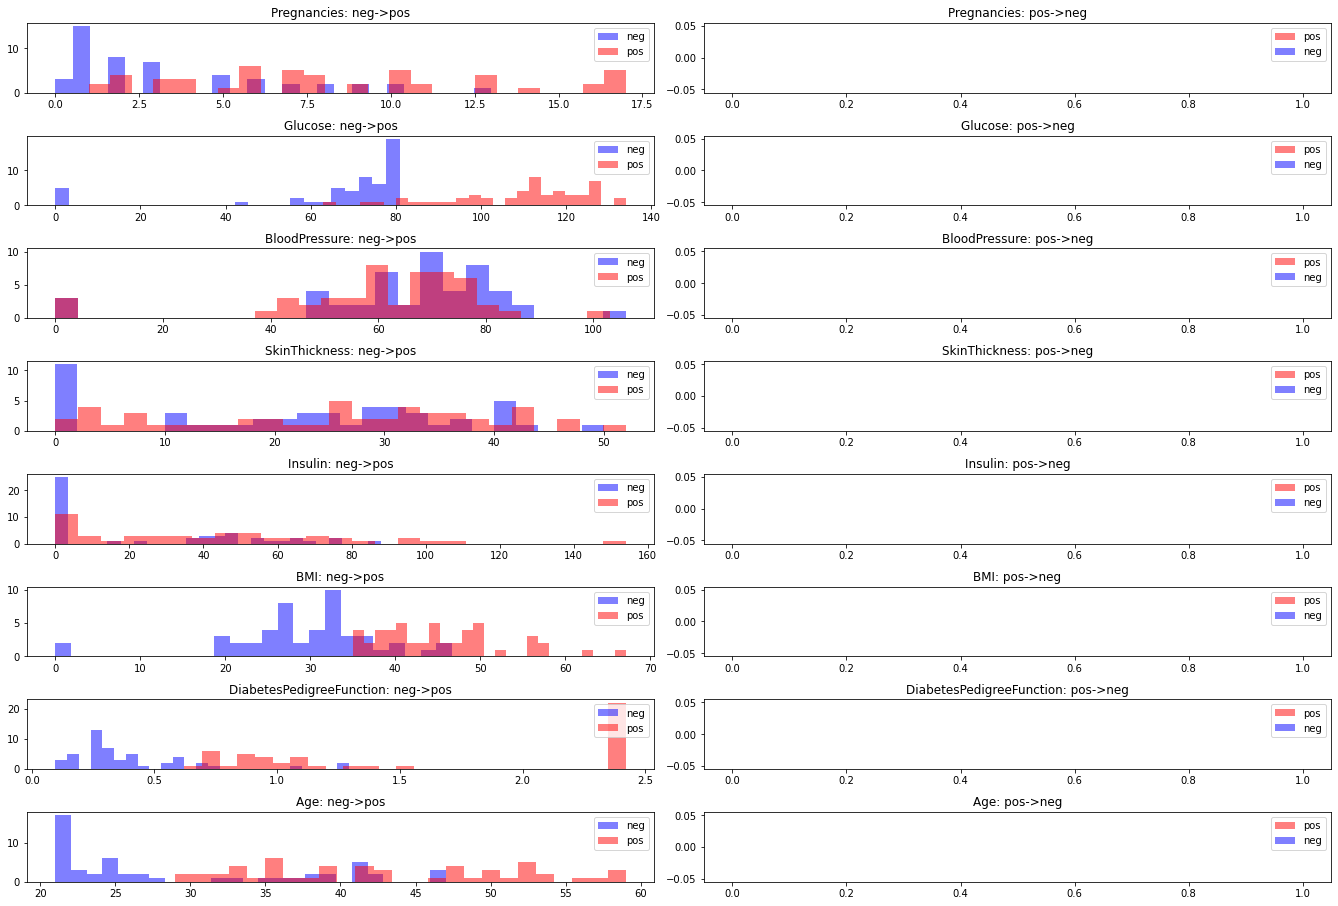

In [7]:
fig = plt.gcf()
fig.set_size_inches(18.5, 12.5)
plot_subset_cf(subset_attr_cf)

In [8]:
subset_attr_cf['Glucose'].get_cf()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_pred,Score,OriginIndex
0,9.0,118.0,50.0,32.0,129.0,39.3,0.424,34.0,1,1,0.512148,6
1,10.0,111.0,69.0,27.0,1.0,37.2,0.871,28.0,1,1,0.536666,47
2,6.0,126.0,46.0,10.0,0.0,32.1,0.470,31.0,1,1,0.523350,55
3,2.0,99.0,61.0,9.0,2.0,38.3,0.892,50.0,1,1,0.502775,62
4,14.0,111.0,77.0,31.0,6.0,36.5,0.726,28.0,1,1,0.520835,74
5,11.0,87.0,48.0,27.0,19.0,42.5,0.789,41.0,1,1,0.527127,75
6,11.0,97.0,78.0,3.0,30.0,41.2,0.787,50.0,1,1,0.532696,76
7,2.0,132.0,0.0,1.0,0.0,20.8,0.538,34.0,1,1,0.522640,81
8,2.0,125.0,48.0,3.0,0.0,34.0,0.558,35.0,1,1,0.556193,90
9,11.0,99.0,82.0,46.0,66.0,50.6,0.506,44.0,1,1,0.503416,92


In [9]:
# subset = {'Glucose': {'max': 57, 'min': 0}, 'Age': {'max': 50, 'min': 0}}
# subset_attr_cf = engine.generate_cfs_subset(subset, batch_size=128)
# fig = plt.gcf()
# fig.set_size_inches(18.5, 12.5)
# plot_subset_cf(subset_attr_cf)

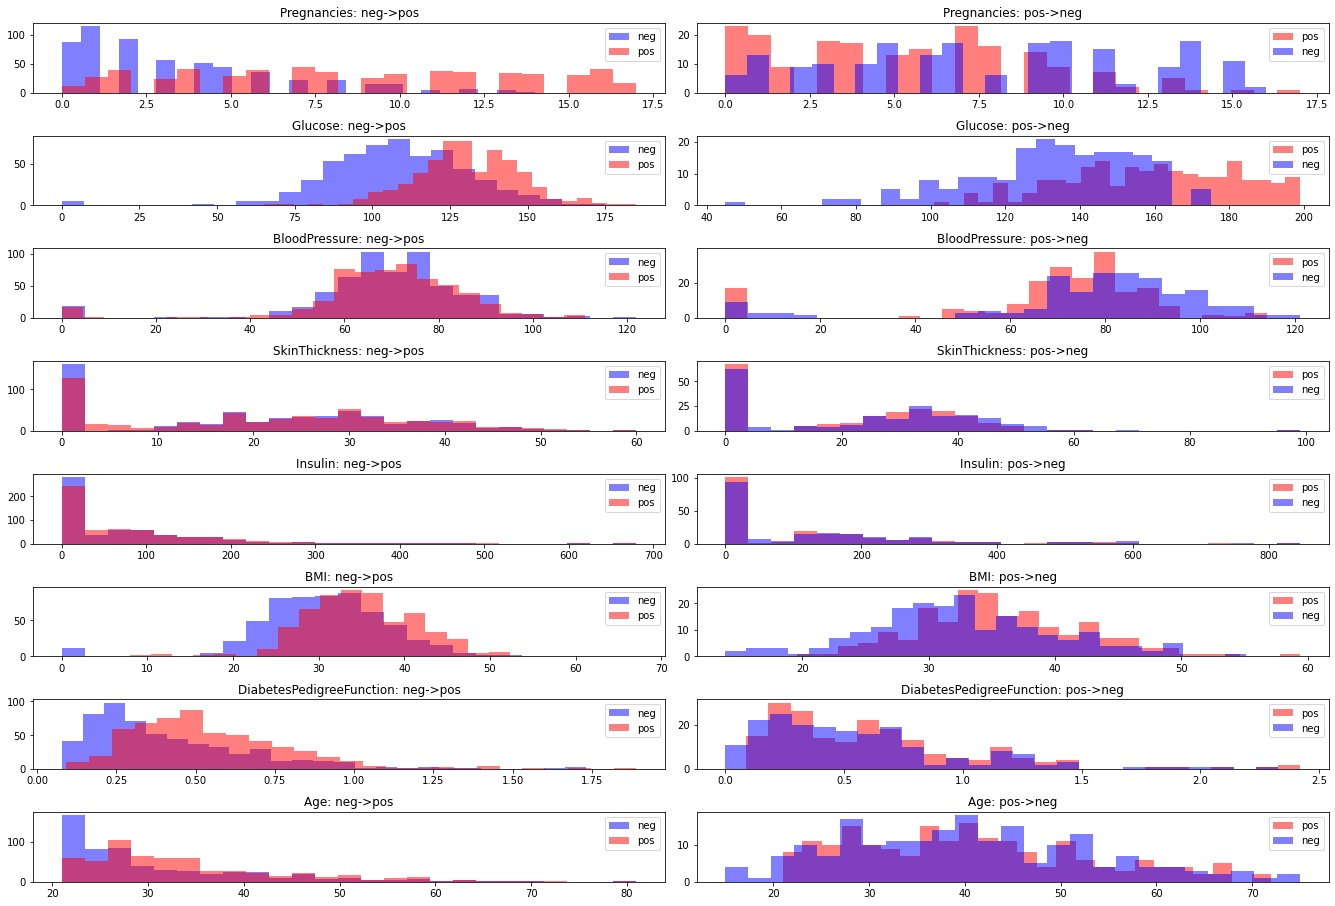

In [10]:
subset = {}
subset_attr_cf = engine.generate_cfs_subset(subset, batch_size=128)
fig = plt.gcf()
fig.set_size_inches(18.5, 12.5)
plot_subset_cf(subset_attr_cf)

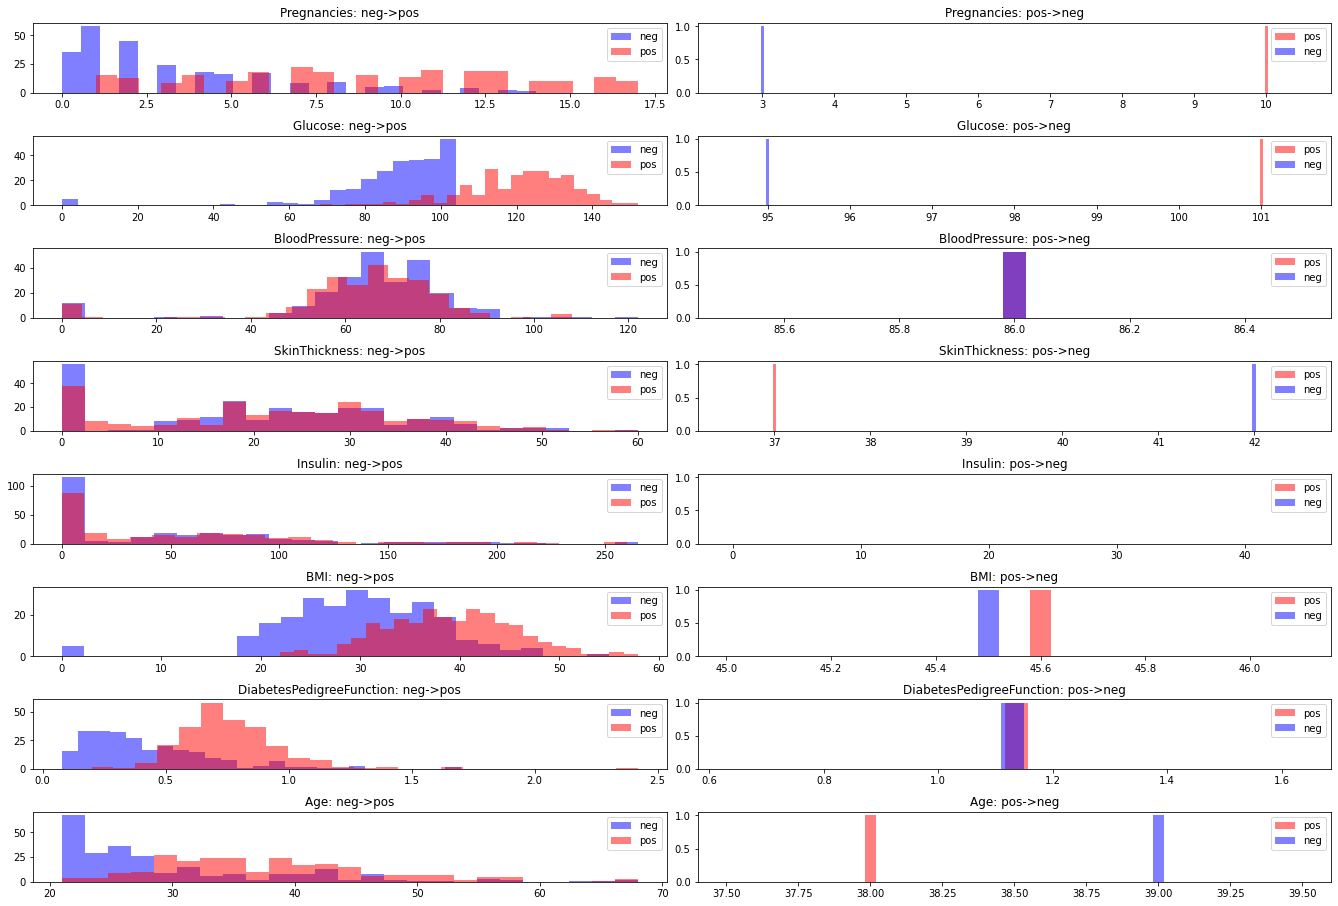

In [11]:
subset = {'Glucose': {'max': 105, 'min': 0}}
subset_attr_cf = engine.generate_cfs_subset(subset, batch_size=128)
fig = plt.gcf()
fig.set_size_inches(18.5, 12.5)
plot_subset_cf(subset_attr_cf)

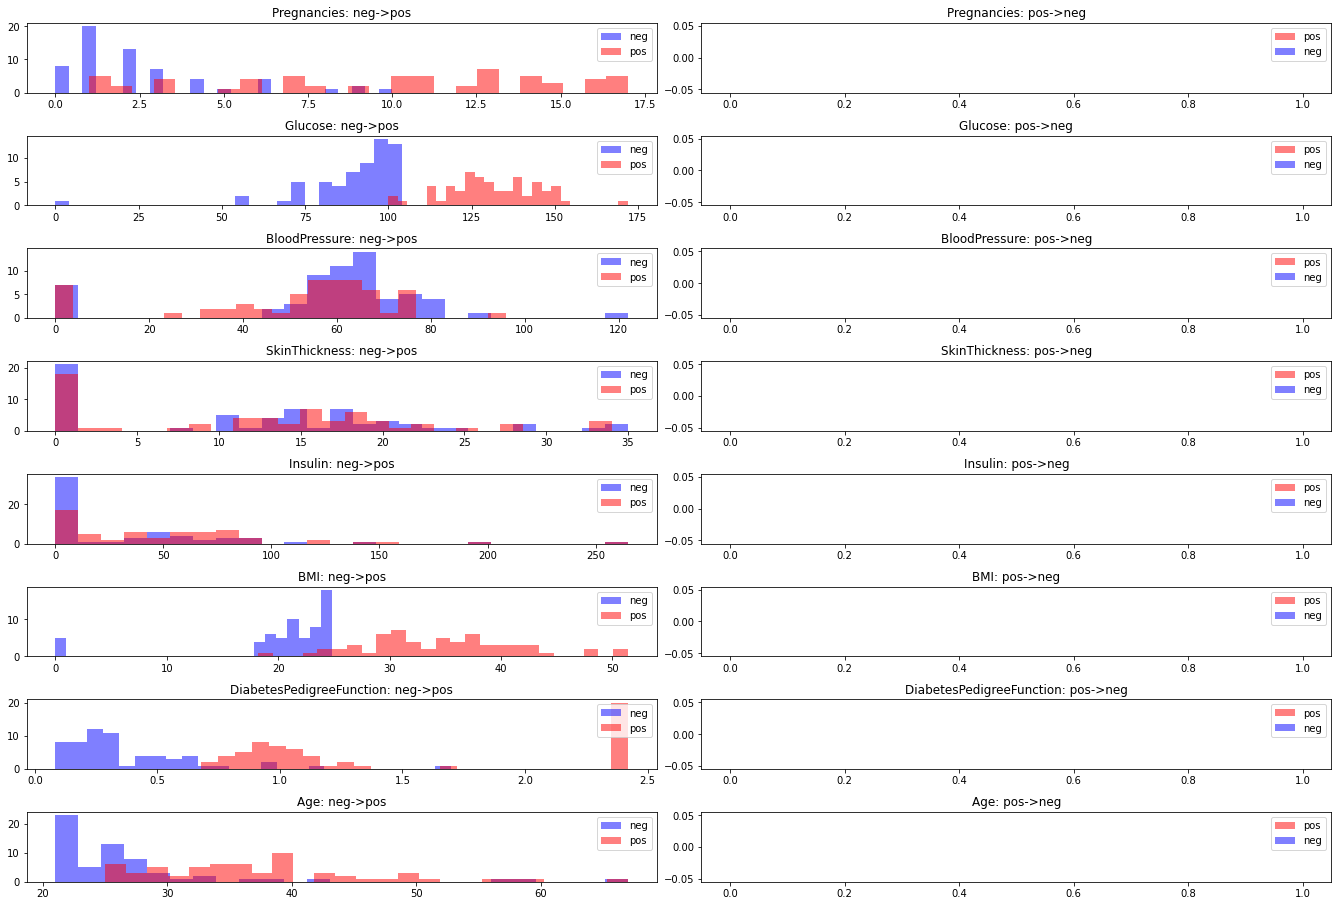

In [12]:
subset = {'Glucose': {'max': 105, 'min': 0}, 'BMI': {'max': 25, 'min': 0}}
subset_attr_cf = engine.generate_cfs_subset(subset, batch_size=128)
fig = plt.gcf()
fig.set_size_inches(18.5, 12.5)
plot_subset_cf(subset_attr_cf)

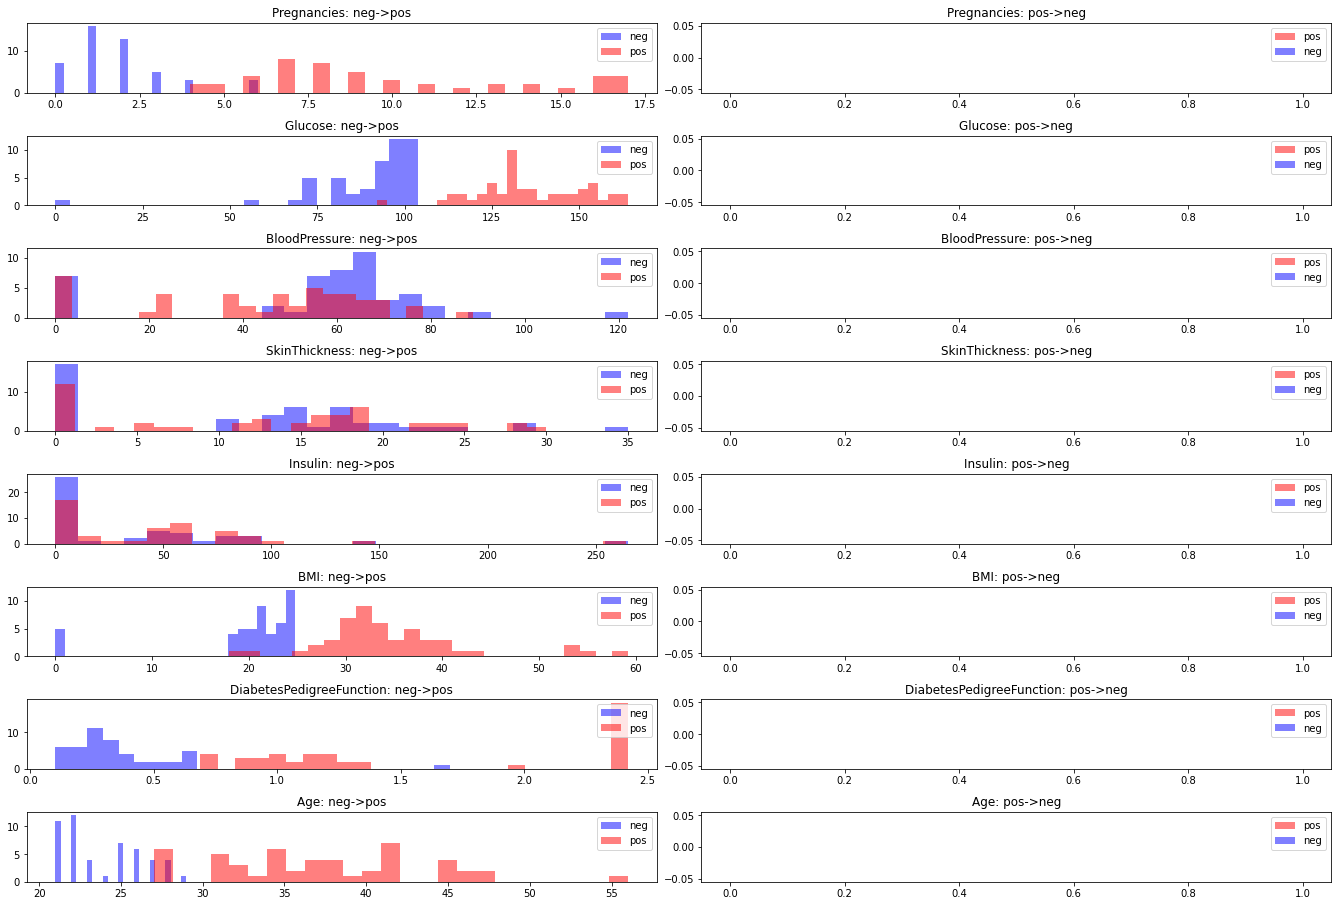

In [26]:
subset = {'Glucose': {'max': 105, 'min': 0}, 'BMI': {'max': 25, 'min': 0}, 'Age': {'max': 30, 'min': 0}}
subset_attr_cf = engine.generate_cfs_subset(subset, batch_size=128, post_step=10)
fig = plt.gcf()
fig.set_size_inches(18.5, 12.5)
plot_subset_cf(subset_attr_cf)

In [28]:
cf = subset_attr_cf['Glucose'].get_cf()
cf[(cf['Outcome'] == 1) & (cf['Glucose'] <100)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_pred,Score,OriginIndex
43,16.0,92.0,76.0,20.0,43.0,24.2,1.698,28.0,1,1,0.610062,621


In [22]:
instance = subset_attr_cf['Glucose'].get_instance()
instance[instance['Outcome'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_pred,Score
0,1.0,97.0,66.0,15.0,140.0,23.2,0.487,22.0,0,0,0.046465
1,3.0,88.0,58.0,11.0,54.0,24.8,0.267,22.0,0,0,0.047909
2,6.0,92.0,92.0,0.0,0.0,19.9,0.188,28.0,0,0,0.032276
3,1.0,103.0,80.0,11.0,82.0,19.4,0.491,22.0,0,0,0.035603
4,1.0,101.0,50.0,15.0,36.0,24.2,0.526,26.0,0,0,0.106396
5,1.0,73.0,50.0,10.0,0.0,23.0,0.248,21.0,0,0,0.030779
6,2.0,84.0,0.0,0.0,0.0,0.0,0.304,21.0,0,0,0.025591
7,1.0,95.0,66.0,13.0,38.0,19.6,0.334,25.0,0,0,0.040198
8,1.0,0.0,48.0,20.0,0.0,24.7,0.140,22.0,0,0,0.006369
9,2.0,74.0,0.0,0.0,0.0,0.0,0.102,22.0,0,0,0.017083


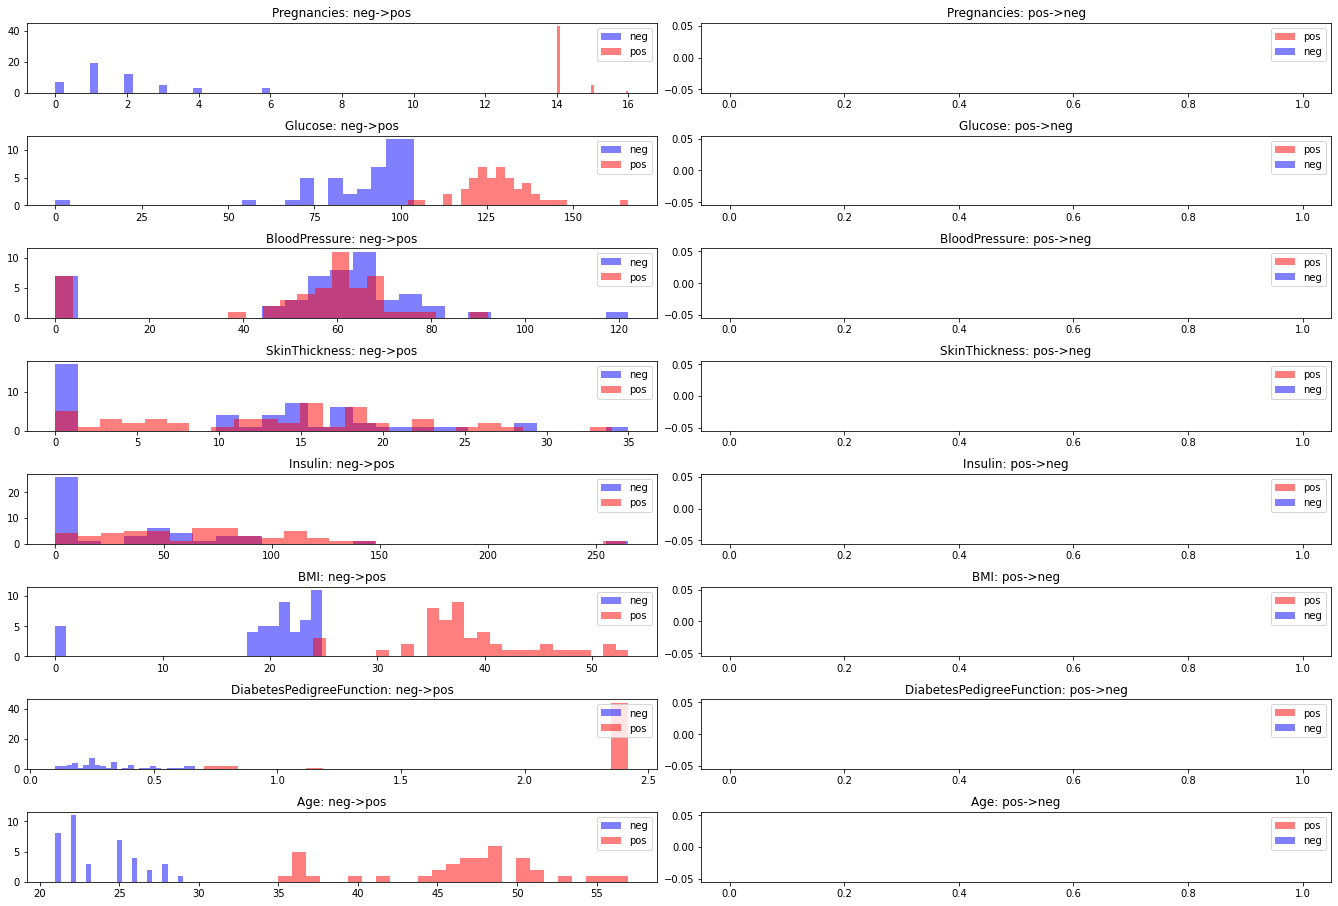

In [30]:
subset = {'Glucose': {'max': 105, 'min': 0}, 'BMI': {'max': 25, 'min': 0}, 
          'Age': {'max': 30, 'min': 0}, 'DiabetesPedigreeFunction': {'max': 1.5, 'min': 0}}
subset_attr_cf = engine.generate_cfs_subset(subset, batch_size=128, post_step=10)
fig = plt.gcf()
fig.set_size_inches(18.5, 12.5)
plot_subset_cf(subset_attr_cf)

In [35]:
cf = subset_attr_cf['BMI'].get_cf()
cf[(cf['Outcome'] == 1) & (cf['BMI'] < 25)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_pred,Score,OriginIndex
6,7.0,105.0,0.0,0.0,17.0,23.9,0.896,27.0,1,1,0.516355,60
34,7.0,105.0,0.0,0.0,6.0,24.5,0.861,30.0,1,1,0.525688,494


In [32]:
instance = subset_attr_cf['Glucose'].get_instance()
instance.loc[48, :]

Pregnancies                  2.00000
Glucose                     90.00000
BloodPressure               60.00000
SkinThickness                0.00000
Insulin                      0.00000
BMI                         23.50000
DiabetesPedigreeFunction     0.19100
Age                         25.00000
Outcome                      0.00000
Outcome_pred                 0.00000
Score                        0.04446
Name: 48, dtype: float64

In [16]:
data_df = dataset.get_sample(preprocess=False)
data_df[data_df['BloodPressure'] < 5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


/Users/chengfurui/Projects/counterfactuals/env/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[49/49]  Epoch-0, time cost: 0.603s, loss: 0.467, iteration: 337, validation rate: 1.000
Total time cost: 0.648, validation rate: 1.000, average distance: 1.384, average loss: 0.467
[49/49]  Epoch-0, time cost: 0.600s, loss: 0.341, iteration: 321, validation rate: 1.000
Total time cost: 0.644, validation rate: 1.000, average distance: 0.701, average loss: 0.341
[49/49]  Epoch-0, time cost: 0.753s, loss: 0.482, iteration: 494, validation rate: 1.000
Total time cost: 0.796, validation rate: 1.000, average distance: 1.395, average loss: 0.482
[49/49]  Epoch-0, time cost: 0.936s, loss: 0.458, iteration: 669, validation rate: 1.000
Total time cost: 0.976, validation rate: 1.000, average distance: 0.986, average loss: 0.458
[49/49]  Epoch-0, time cost: 0.776s, loss: 0.485, iteration: 474, validation rate: 1.000
Total time cost: 0.817, validation rate: 1.000, average distance: 1.405, average loss: 0.485
[49/49]  Epoch-0, time cost: 0.552s, loss: 0.492, iteration: 323, validation rate: 1.000
T

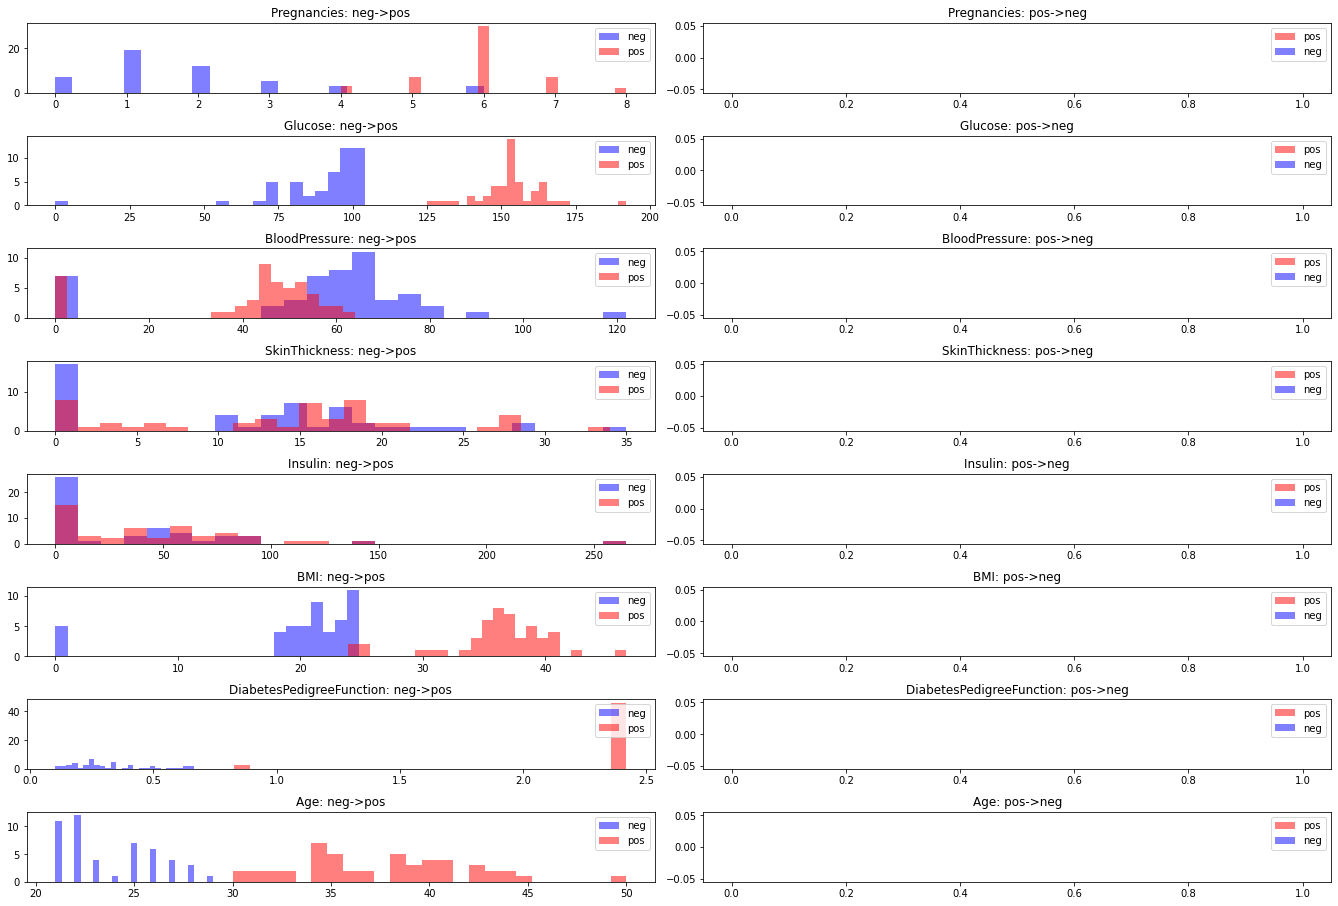

In [34]:
subset = {'Glucose': {'max': 105, 'min': 0}, 'BMI': {'max': 25, 'min': 0}, 
          'Age': {'max': 30, 'min': 0}, 'DiabetesPedigreeFunction': {'max': 1.5, 'min': 0}, 
          'Pregnancies': {'max': 7, 'min': 0}}
subset_attr_cf = engine.generate_cfs_subset(subset, batch_size=128, post_step=10)
fig = plt.gcf()
fig.set_size_inches(18.5, 12.5)
plot_subset_cf(subset_attr_cf)

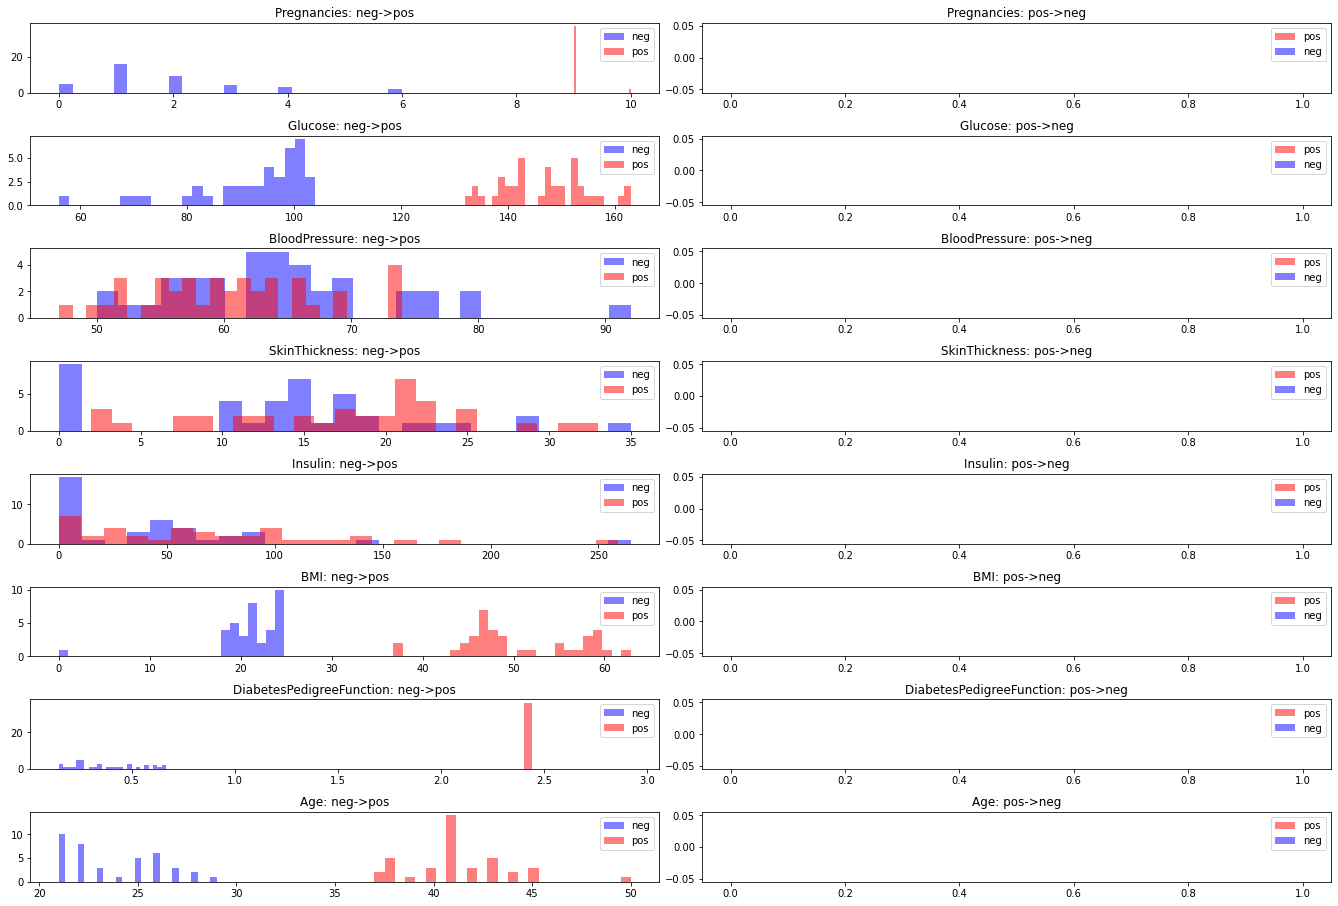

In [37]:
subset = {'Glucose': {'max': 105, 'min': 0}, 'BMI': {'max': 25, 'min': 0}, 
          'DiabetesPedigreeFunction': {'max': 1.5, 'min': 0},
          'Age': {'max': 30, 'min': 0}, 'BloodPressure': {'min': 50, 'max':122}}
subset_attr_cf = engine.generate_cfs_subset(subset, batch_size=128, post_step=10)
fig = plt.gcf()
fig.set_size_inches(18.5, 12.5)
plot_subset_cf(subset_attr_cf)